<a href="https://colab.research.google.com/github/janputra/Physic-Informed-Neural-Networks-Practices-/blob/main/PINN_Disc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pyDOE

Requirement already up-to-date: pyDOE in /usr/local/lib/python3.6/dist-packages (0.3.8)


In [ ]:
# import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model
from pyDOE import lhs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
freq=20000
T0=1/freq*1000000 #in microsecond
step=0.00000001
l0=120       #in milimeter
T0

50.0

In [ ]:
t_test=np.arange(0,T0,0.025)
x_test=np.arange(0,l0,0.05)

t_test.shape

(2000,)

In [ ]:
BC_t0=np.hstack((x_test.flatten()[:,None],np.zeros(x_test.shape[0]).flatten()[:,None]))


amp=7.5/1000
init=amp*np.sin(2*math.pi*(freq/1000000)*t_test)
end =-init

In [ ]:
# omega=2*math.pi*freq/1000000

# temp=-amp*np.exp(omega*1j*t_test)
# plt.figure()
# plt.plot(t_test,temp.real)

In [ ]:
init.shape

(2000,)

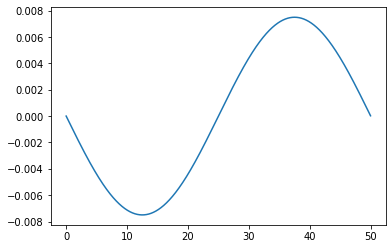

In [ ]:

plt.figure()
plt.plot(t_test,end)

[[ 7.5059844 ]
 [45.35564581]
 [47.6829524 ]
 [38.80254446]
 [41.66731776]
 [ 2.36869841]
 [13.32881087]
 [30.14322141]
 [25.62678101]
 [44.75232826]
 [14.233003  ]
 [33.35768041]
 [ 8.68722003]
 [42.03578894]
 [29.10314608]
 [32.42939746]
 [34.16896164]
 [23.79048399]
 [ 9.97969214]
 [48.84449105]
 [10.96790567]
 [43.2369335 ]
 [ 6.06416107]
 [17.44972214]
 [21.63813852]
 [ 3.55071034]
 [26.66932626]
 [20.89998067]
 [28.37354112]
 [27.70230328]
 [18.2278482 ]
 [12.41469239]
 [39.65578221]
 [24.48662743]
 [37.55276801]
 [49.24834172]
 [35.80009014]
 [22.92960398]
 [36.17466877]
 [16.70472033]
 [ 0.32762007]
 [ 1.80571507]
 [31.98617978]
 [ 5.8718934 ]
 [15.61056362]
 [ 4.95791362]
 [46.26798717]
 [19.3442882 ]
 [11.06940039]
 [40.68362316]]
[[ 14.6125615 ]
 [ 45.92375805]
 [117.6399136 ]
 [  9.59607651]
 [ 64.94583493]
 [ 76.17287717]
 [ 91.74671687]
 [ 81.20167447]
 [ 96.42015142]
 [ 33.7679416 ]
 [112.82447754]
 [ 33.3317969 ]
 [107.78581507]
 [110.66142774]
 [ 24.02640054]
 [103.252

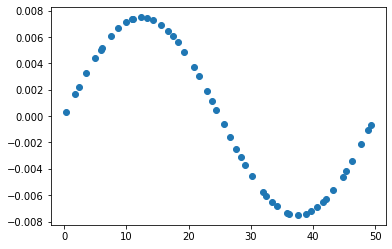

In [ ]:
t = 0 + (T0)*lhs(1, 50)
x=0+(l0)*lhs(1,50)
print(t)
print(x)
temp=amp*np.sin(2*math.pi*(freq/1000000)*t)

plt.figure()
plt.scatter(t,temp)

In [ ]:
X,T= np.meshgrid(x,t)
data_pde=np.hstack((X.flatten()[:,None], T.flatten()[:,None]))

In [ ]:
idx= np.random.choice(t_test.shape[0],50, replace=False)

In [ ]:
init_x=init[idx]
end_x=end[idx]
t_test_x=t_test[idx]
zero=np.zeros(t_test_x.shape[0])
x_end=l0*np.ones(t_test_x.shape[0])
t_test_init=np.hstack((zero.flatten()[:,None],t_test_x.flatten()[:,None]))
t_test_end=np.hstack((x_end.flatten()[:,None],t_test_x.flatten()[:,None]))

BC_t0_x=BC_t0[idx]

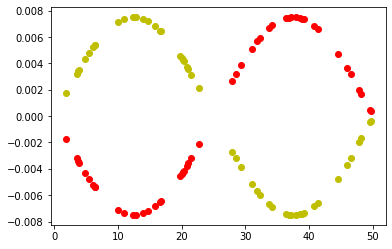

In [ ]:
plt.figure()

plt.scatter(t_test_x,end_x,color='r')
plt.scatter(t_test_x,init_x,color='y')

In [ ]:
data_pde.shape

(2500, 2)

In [ ]:
def build_model(layers):
    i = Input(shape=(layers[0],))
    o = Dense(layers[1],activation="tanh")(i) 
    for x in layers[2:-1]:
        o = Dense(x,activation="tanh")(o)
    o = Dense(layers[-1],activation="linear")(o)
    model=Model(inputs=i, outputs=o)
    return model

In [ ]:
layers=[2,40,40,40,40,40,1]
model=build_model(layers)
model.summary()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [ ]:
  # The actual PINN
c = 5.1

def f_model():
    # Using the new GradientTape paradigm of TF2.0,
    # which keeps track of operations to get the gradient at runtime
    
    x_f = tf.convert_to_tensor(data_pde[:, 0:1], dtype=tf.float32)
    t_f = tf.convert_to_tensor(data_pde[:, 1:2], dtype=tf.float32)
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_f)
        tape.watch(t_f)
        X_f = tf.stack([x_f[:,0], t_f[:,0]], axis=1)
        
      # Getting the prediction
        u=model(X_f)
        # Deriving INSIDE the tape (since we’ll need the x derivative of this later, u_xx)
        u_x = tape.gradient(u, x_f)
        u_t = tape.gradient(u,t_f)
        
    u_tt = tape.gradient(u_t, t_f)
    u_xx= tape.gradient(u_x,x_f)
    
    # Letting the tape go
    del tape

    # Buidling the PINNs
    return u_xx+(u_tt/(c**2))


def _wrap_training_variables():
    var=model.trainable_variables
#     var.extend([c])
    return var

def _loss():
    f_pred=f_model()
    f_init=model(t_test_init)
    f_end=model(t_test_end)
    f_t0=model(BC_t0_x)
    return tf.reduce_mean(abs(f_pred)) + tf.reduce_mean(abs(f_init-init_x)) + tf.reduce_mean(abs(f_t0)) +tf.reduce_mean(abs(f_end-end_x))
    return tf.reduce_mean(abss(f_init-init_x))+tf.reduce_mean(abs(f_t0)) +tf.reduce_mean(abs(f_end-end_x))

def _grad():
    with tf.GradientTape() as tape:
          loss_value = _loss()
    return loss_value, tape.gradient(loss_value, _wrap_training_variables())

def fit():
    for epoch in range(epochs):
        # Optimization step
        loss_value, grads = _grad()
        optimizer.apply_gradients(zip(grads, _wrap_training_variables()))
        print ('epoch : ',epoch,' loss : ',loss_value )
    # print ('epoch : ',epoch,' loss : ',loss_value )

def predict(x):
    return model(x)


In [ ]:
c

5.1

In [ ]:
optimizer = tf.keras.optimizers.Adam(
  learning_rate=0.001)

In [ ]:
epochs = 1000
fit() 


Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BiasAdd in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Tanh in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BiasAddGrad in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TanhGrad in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Unpack in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSliceGrad in device /job:localhost/replica:0/task:0/device:GPU:

In [ ]:
a=np.arange(0,T0,0.05)
b=np.arange(0,l0,0.5)


A,B= np.meshgrid(b,a)
d_test=np.hstack((A.flatten()[:,None], B.flatten()[:,None]))
d_test.shape




(240000, 2)

In [ ]:
res=model(d_test)
res=res.numpy()
res=res.reshape(b.shape[0],a.shape[0])

res.shape

(240, 1000)

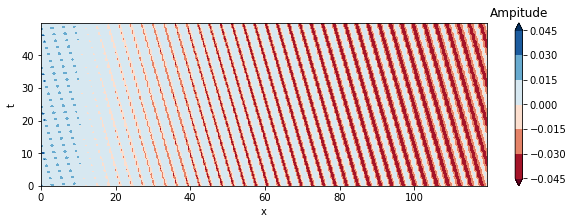

In [ ]:
plt.figure(figsize=(10,3))
plt.xlabel('x')
plt.ylabel('t')

levels=np.arange(-amp,amp,0.00001)
#plt.contourf(A,B,res.T,levels,cmap='RdBu',extend='both' )
plt.contourf(A,B,res.T,cmap='RdBu',extend='both' )
clb = plt.colorbar()
clb.ax.set_title('Ampitude')
plt.show()

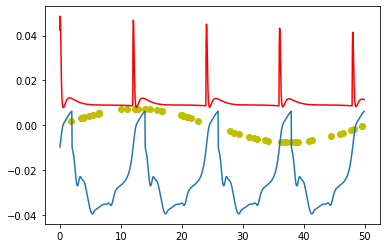

In [ ]:
plt.figure()
plt.plot(a,res[239,:])
plt.plot(a,res[0,:],color='r')
plt.scatter(t_test_x,init_x,color='y')

